# Imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import normalize
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


# EDA

In [2]:
#Load data
va_dt=pd.read_csv("Vancouver.csv")
va_dt.head()

C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-8.859955e+06,5.424372e+06,110,GO-20141625305,D23,2014/03/02 05:00:00+00,2014/03/02 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,...,2,61,Sunday,8,Assault,1,West Humber-Clairville,-79.590332,43.734013,1
1,-8.861110e+06,5.424036e+06,188,GO-20141272968,D23,2013/12/24 05:00:00+00,2014/01/03 05:00:00+00,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,1610,...,24,358,Tuesday,22,Robbery,1,West Humber-Clairville,-79.600701,43.731834,2
2,-8.861120e+06,5.417043e+06,287,GO-20141284361,D23,2013/01/05 05:00:00+00,2014/01/05 05:00:00+00,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,1430,...,5,5,Saturday,4,Assault,1,West Humber-Clairville,-79.600794,43.686423,3
3,-8.861463e+06,5.425856e+06,384,GO-20141292177,D23,2013/12/31 05:00:00+00,2014/01/06 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2120,...,31,365,Tuesday,21,Break and Enter,1,West Humber-Clairville,-79.603876,43.743642,4
4,-8.859522e+06,5.418688e+06,438,GO-20141297201,D23,2014/01/03 05:00:00+00,2014/01/07 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2120,...,3,3,Friday,10,Break and Enter,1,West Humber-Clairville,-79.586443,43.697108,5


In [3]:
va_dt.shape

(281692, 30)

In [4]:
va_dt.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'Division', 'occurrencedate',
       'reporteddate', 'location_type', 'premises_type', 'ucr_code', 'ucr_ext',
       'offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour', 'MCI',
       'Hood_ID', 'Neighbourhood', 'Long', 'Lat', 'ObjectId'],
      dtype='object')

In [5]:
#Data Types
va_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281692 entries, 0 to 281691
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    281692 non-null  float64
 1   Y                    281692 non-null  float64
 2   Index_               281692 non-null  int64  
 3   event_unique_id      281692 non-null  object 
 4   Division             281692 non-null  object 
 5   occurrencedate       281692 non-null  object 
 6   reporteddate         281692 non-null  object 
 7   location_type        281692 non-null  object 
 8   premises_type        281692 non-null  object 
 9   ucr_code             281692 non-null  int64  
 10  ucr_ext              281692 non-null  int64  
 11  offence              281692 non-null  object 
 12  reportedyear         281692 non-null  int64  
 13  reportedmonth        281692 non-null  object 
 14  reportedday          281692 non-null  int64  
 15  reporteddayofyear

In [6]:
va_dt.offence.value_counts()

Assault                           103627
B&E                                47662
Theft Of Motor Vehicle             36334
Assault With Weapon                25345
Robbery - Mugging                   8159
B&E W'Intent                        6977
Assault Bodily Harm                 6682
Theft Over                          5164
Assault Peace Officer               4845
Robbery - Other                     4605
Robbery With Weapon                 4561
Robbery - Business                  3975
Assault - Resist/ Prevent Seiz      2888
Aggravated Assault                  2384
Theft From Motor Vehicle Over       2245
Robbery - Swarming                  2242
Discharge Firearm With Intent       1929
Unlawfully In Dwelling-House        1704
Discharge Firearm - Recklessly      1330
Theft From Mail / Bag / Key         1121
Robbery - Home Invasion             1077
Pointing A Firearm                  1040
Robbery - Purse Snatch              1010
Robbery - Financial Institute        861
Robbery - Vehicl

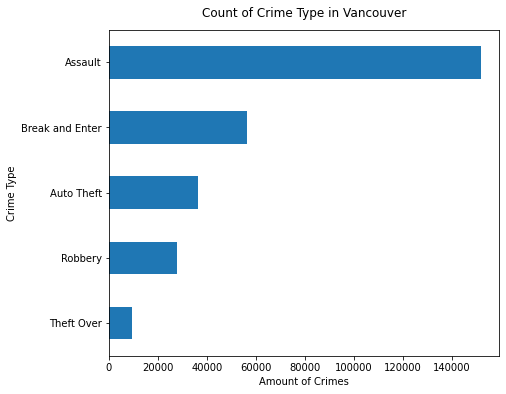

In [7]:
va_dt['MCI'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(7, 6), rot=0)
plt.title("Count of Crime Type in Vancouver", y=1.02)
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')
plt.show()

In [8]:
va_dt.describe()

,X,Y,Index_,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Long,Lat,ObjectId
count,2.816920e+05,2.816920e+05,281692.000000,281692.000000,281692.000000,281692.000000,281692.000000,281692.000000,281692.000000,281692.000000,281692.000000,281692.000000,281692.000000,281692.000000,281692.000000,281692.000000
mean,-8.724979e+06,5.350689e+06,140846.500000,1700.295078,146.314340,2017.590723,15.746688,186.640011,12.830996,2016.859148,15.466115,186.000170,12.604107,-78.377824,43.146377,140846.500000
std,9.945911e+05,6.099572e+05,81317.620352,325.422029,51.905633,2.256068,8.768257,103.870137,6.516960,37.115673,8.918215,104.241244,7.238679,8.934564,4.918359,81317.620352
min,-8.909923e+06,0.000000e+00,1.000000,1410.000000,100.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-80.039196,0.000000,1.000000
25%,-8.846608e+06,5.412955e+06,70423.750000,1430.000000,100.000000,2016.000000,8.000000,98.000000,8.000000,2016.000000,8.000000,97.000000,7.000000,-79.470433,43.659862,70423.750000
50%,-8.837968e+06,5.419023e+06,140846.500000,1450.000000,100.000000,2018.000000,16.000000,189.000000,13.000000,2018.000000,16.000000,188.000000,14.000000,-79.392819,43.699285,140846.500000
75%,-8.829728e+06,5.426993e+06,211269.250000,2120.000000,200.000000,2019.000000,23.000000,276.000000,18.000000,2019.000000,23.000000,276.000000,19.000000,-79.318798,43.751025,211269.250000
max,0.000000e+00,5.517228e+06,281692.000000,2135.000000,230.000000,2021.000000,31.000000,366.000000,23.000000,2021.000000,31.000000,366.000000,23.000000,0.000000,44.333691,281692.000000


array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'Index_'}>,
        <AxesSubplot:title={'center':'ucr_code'}>],
       [<AxesSubplot:title={'center':'ucr_ext'}>,
        <AxesSubplot:title={'center':'reportedyear'}>,
        <AxesSubplot:title={'center':'reportedday'}>,
        <AxesSubplot:title={'center':'reporteddayofyear'}>],
       [<AxesSubplot:title={'center':'reportedhour'}>,
        <AxesSubplot:title={'center':'occurrenceyear'}>,
        <AxesSubplot:title={'center':'occurrenceday'}>,
        <AxesSubplot:title={'center':'occurrencedayofyear'}>],
       [<AxesSubplot:title={'center':'occurrencehour'}>,
        <AxesSubplot:title={'center':'Long'}>,
        <AxesSubplot:title={'center':'Lat'}>,
        <AxesSubplot:title={'center':'ObjectId'}>]], dtype=object)

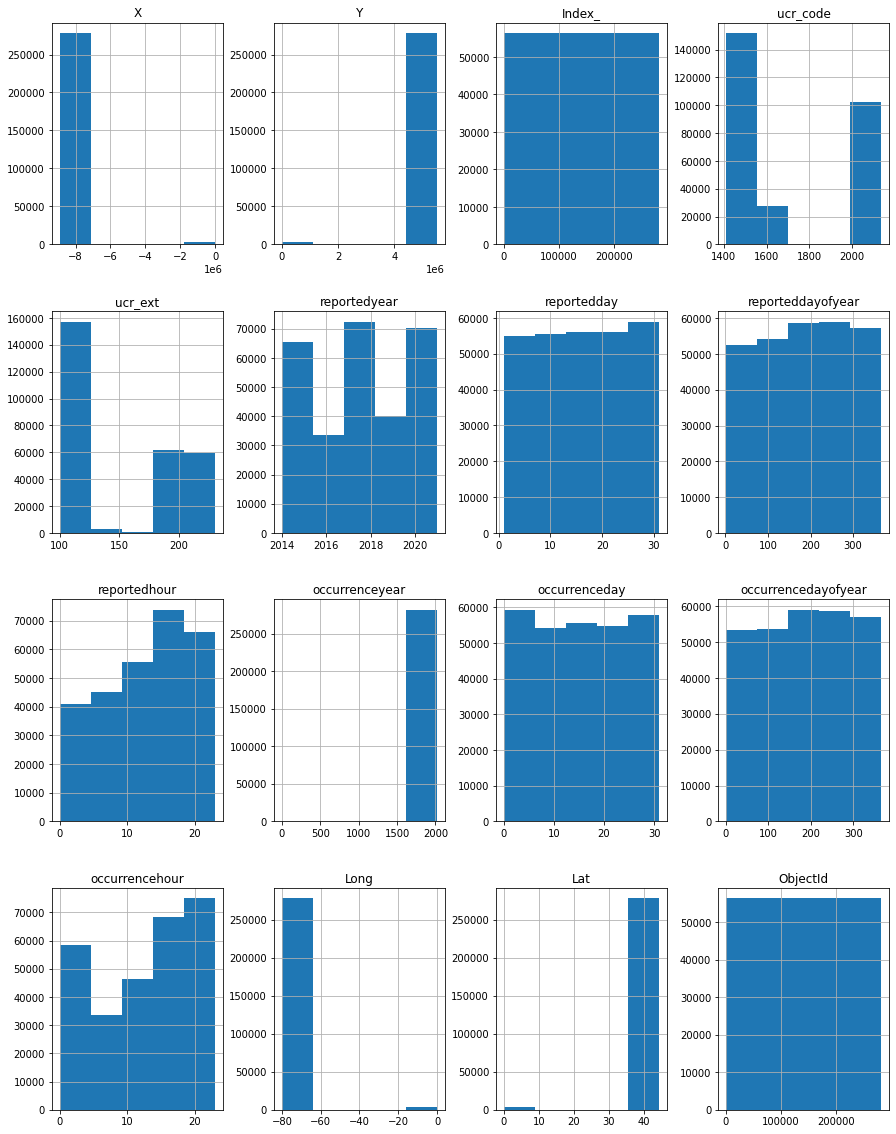

In [9]:
va_dt.hist(bins=5,figsize=(15,20))

In [10]:
cor=va_dt.corr()
cor

,X,Y,Index_,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Long,Lat,ObjectId
X,1.000000,-0.999789,0.005392,-0.027226,-0.020285,0.013924,-0.002871,-0.005800,0.007405,-0.014436,-0.003756,-0.005663,0.002654,1.000000,-0.999831,0.188734
Y,-0.999789,1.000000,-0.006127,0.026861,0.019960,-0.014470,0.002892,0.005689,-0.006517,0.014335,0.003671,0.005499,-0.002154,-0.999789,0.999997,-0.177998
Index_,0.005392,-0.006127,1.000000,0.287852,0.252681,0.808727,0.008287,0.103096,-0.040937,0.056150,0.004610,0.097146,0.049181,0.005392,-0.006178,-0.060764
ucr_code,-0.027226,0.026861,0.287852,1.000000,0.918921,0.027264,0.000608,0.009376,-0.072508,0.013672,0.012577,0.015435,-0.040550,-0.027226,0.026758,-0.072892
ucr_ext,-0.020285,0.019960,0.252681,0.918921,1.000000,0.011789,-0.000295,0.007057,-0.058440,0.013785,0.013587,0.013010,-0.021774,-0.020285,0.019860,-0.062138
reportedyear,0.013924,-0.014470,0.808727,0.027264,0.011789,1.000000,0.002389,-0.003862,-0.005525,0.066120,-0.005338,-0.003575,0.007028,0.013924,-0.014411,-0.003407
reportedday,-0.002871,0.002892,0.008287,0.000608,-0.000295,0.002389,1.000000,0.087095,-0.002260,0.001200,0.820153,0.073280,-0.001883,-0.002871,0.002892,0.002755
reporteddayofyear,-0.005800,0.005689,0.103096,0.009376,0.007057,-0.003862,0.087095,1.000000,-0.007751,0.001991,0.073420,0.936150,0.003310,-0.005800,0.005694,-0.007868
reportedhour,0.007405,-0.006517,-0.040937,-0.072508,-0.058440,-0.005525,-0.002260,-0.007751,1.000000,-0.001393,-0.007339,-0.008557,0.568026,0.007405,-0.006641,0.006397
occurrenceyear,-0.014436,0.014335,0.056150,0.013672,0.013785,0.066120,0.001200,0.001991,-0.001393,1.000000,0.032664,0.032746,0.017790,-0.014436,0.014343,-0.003523


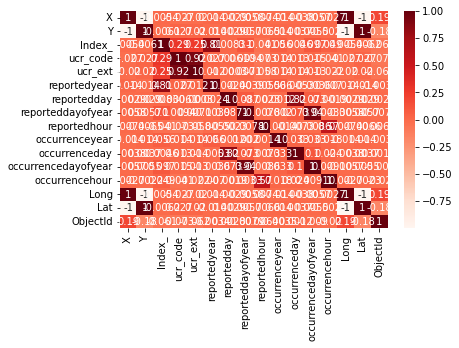

In [11]:
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
va_dt.duplicated().sum()

0

# Data Processing

In [13]:
va_dt.isnull().sum()

X                       0
Y                       0
Index_                  0
event_unique_id         0
Division                0
occurrencedate          0
reporteddate            0
location_type           0
premises_type           0
ucr_code                0
ucr_ext                 0
offence                 0
reportedyear            0
reportedmonth           0
reportedday             0
reporteddayofyear       0
reporteddayofweek       0
reportedhour            0
occurrenceyear          0
occurrencemonth        95
occurrenceday           0
occurrencedayofyear     0
occurrencedayofweek    95
occurrencehour          0
MCI                     0
Hood_ID                 0
Neighbourhood           0
Long                    0
Lat                     0
ObjectId                0
dtype: int64

In [14]:
va_dt['ucr_code']

0         1430
1         1610
2         1430
3         2120
4         2120
          ... 
281687    2120
281688    2120
281689    1430
281690    1430
281691    1420
Name: ucr_code, Length: 281692, dtype: int64

In [15]:
va_dt.location_type.value_counts()

Apartment (Rooming House, Condo)                                          67468
Single Home, House (Attach Garage, Cottage, Mobile)                       50689
Streets, Roads, Highways (Bicycle Path, Private Road)                     44763
Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg    32462
Parking Lots (Apt., Commercial Or Non-Commercial)                         23301
Bar / Restaurant                                                          11342
Open Areas (Lakes, Parks, Rivers)                                          6032
Schools During Supervised Activity                                         4332
Convenience Stores                                                         3600
Ttc Subway Station                                                         3315
Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)          3270
Schools During Un-Supervised Activity                                      2521
Hospital / Institutions / Medical Facili

In [16]:
'''
#categorical the location by replace the value
va_dt['location_type'] = va_dt['location_type'].replace(['Other Train Admin Or Support Facility', 'Other Train Tracks','Other Train Yard','Other Passenger Train','Go Train','Cargo Train','Ttc Subway Train'], 'Train')
va_dt['location_type'] = va_dt['location_type'].replace(['Other Passenger Train Station', 'Ttc Light Rail Transit Station','Go Station','Gas Station (Self, Full, Attached Convenience)','Ttc Subway Station','Ttc Subway Tunnel / Outdoor Tracks'], 'Station')
va_dt['location_type'] = va_dt['location_type'].replace(['Ttc Bus', 'Ttc Light Rail Transit Station','Ttc Bus Stop / Shelter / Loop','Go Bus','Ttc Bus Garage'], 'bus')
va_dt['location_type'] = va_dt['location_type'].replace(['Schools During Supervised Activity', 'Schools During Un-Supervised Activity','Universities / Colleges'], 'school')
va_dt['location_type'] = va_dt['location_type'].replace(['Streets, Roads, Highways (Bicycle Path, Private Road)', 'Ttc Street Car'], 'Streets')
va_dt['location_type'] = va_dt['location_type'].replace(['Dealership (Car, Motorcycle, Marine, Trailer, Etc.)', 'Other Regional Transit System Vehicle','Ttc Light Rail Vehicle','Ttc Wheel Trans Vehicle','Ttc Support Vehicle'], 'Vehicle')
va_dt['location_type'] = va_dt['location_type'].replace(['Single Home, House (Attach Garage, Cottage, Mobile)'], 'Single_Home')
va_dt['location_type'] = va_dt['location_type'].replace(['Bar / Restaurant'], 'Restaurant')
va_dt['location_type'] = va_dt['location_type'].replace(['Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg','Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)'], 'Commercial')
va_dt['location_type'] = va_dt['location_type'].replace(["Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)","Homeless Shelter / Mission","Retirement Home"], 'Non_Commercial')
va_dt['location_type'] = va_dt['location_type'].replace(["Group Homes (Non-Profit, Halfway House, Social Agency)","Community Group Home","Halfway House"], 'Group_Homes')
va_dt['location_type'] = va_dt['location_type'].replace(["Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)","Pharmacy","Nursing Home"], 'Medical_institutions')
va_dt['location_type'] = va_dt['location_type'].replace(['Police / Courts (Parole Board, Probation Office)','Jails / Detention Centres'], 'Judicial_institutions')
va_dt['location_type'] = va_dt['location_type'].replace(['Religious Facilities (Synagogue, Church, Convent, Mosque)'],'Religious' )
va_dt['location_type'] = va_dt['location_type'].replace(['Bank And Other Financial Institutions (Money Mart, Tsx)'], 'Financial_Institutions')
va_dt['location_type'] = va_dt['location_type'].replace(['Open Areas (Lakes, Parks, Rivers)'], 'Open_Areas')
va_dt['location_type'] = va_dt['location_type'].replace(['Parking Lots (Apt., Commercial Or Non-Commercial)'], 'Parking_Lots')
va_dt['location_type'] = va_dt['location_type'].replace(['Apartment (Rooming House, Condo)'], 'Apartment')
va_dt['location_type'] = va_dt['location_type'].replace(['Construction Site (Warehouse, Trailer, Shed)'], 'Construction_Site')
va_dt['location_type'] = va_dt['location_type'].replace(['Private Property Structure (Pool, Shed, Detached Garage)'], 'Private_Structure')
va_dt['location_type'] = va_dt['location_type'].replace(['Ttc Admin Or Support Facility'], 'Admin')
va_dt['location_type'] = va_dt['location_type'].replace(['Unknown'], np.nan)
'''


'\n#categorical the location by replace the value\nva_dt[\'location_type\'] = va_dt[\'location_type\'].replace([\'Other Train Admin Or Support Facility\', \'Other Train Tracks\',\'Other Train Yard\',\'Other Passenger Train\',\'Go Train\',\'Cargo Train\',\'Ttc Subway Train\'], \'Train\')\nva_dt[\'location_type\'] = va_dt[\'location_type\'].replace([\'Other Passenger Train Station\', \'Ttc Light Rail Transit Station\',\'Go Station\',\'Gas Station (Self, Full, Attached Convenience)\',\'Ttc Subway Station\',\'Ttc Subway Tunnel / Outdoor Tracks\'], \'Station\')\nva_dt[\'location_type\'] = va_dt[\'location_type\'].replace([\'Ttc Bus\', \'Ttc Light Rail Transit Station\',\'Ttc Bus Stop / Shelter / Loop\',\'Go Bus\',\'Ttc Bus Garage\'], \'bus\')\nva_dt[\'location_type\'] = va_dt[\'location_type\'].replace([\'Schools During Supervised Activity\', \'Schools During Un-Supervised Activity\',\'Universities / Colleges\'], \'school\')\nva_dt[\'location_type\'] = va_dt[\'location_type\'].replace([\'St

In [17]:
va_dt['premises_type'].value_counts()

Outside        74899
Apartment      67468
Commercial     56973
House          50689
Other          16394
Transit         7886
Educational     7383
Name: premises_type, dtype: int64

In [18]:
va_dt['occurrenceyear'].value_counts()

2019    39912
2018    37408
2017    35484
2020    34866
2021    33685
2016    33596
2015    32910
2014    32459
2013      594
2012      182
2011      128
2010       96
0          95
2009       71
2008       42
2007       35
2004       26
2005       24
2000       22
2001       20
2003       14
2002       12
2006       11
Name: occurrenceyear, dtype: int64

In [19]:
#drop all missing data
va_dt.dropna(axis=0,inplace=True)

In [20]:
'''
va_dt['occurrencedate'] =  pd.to_datetime(va_dt['occurrencedate'])
va_dt['reporteddate'] =  pd.to_datetime(va_dt['reporteddate'])
'''

"\nva_dt['occurrencedate'] =  pd.to_datetime(va_dt['occurrencedate'])\nva_dt['reporteddate'] =  pd.to_datetime(va_dt['reporteddate'])\n"

In [21]:
va_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281597 entries, 0 to 281691
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    281597 non-null  float64
 1   Y                    281597 non-null  float64
 2   Index_               281597 non-null  int64  
 3   event_unique_id      281597 non-null  object 
 4   Division             281597 non-null  object 
 5   occurrencedate       281597 non-null  object 
 6   reporteddate         281597 non-null  object 
 7   location_type        281597 non-null  object 
 8   premises_type        281597 non-null  object 
 9   ucr_code             281597 non-null  int64  
 10  ucr_ext              281597 non-null  int64  
 11  offence              281597 non-null  object 
 12  reportedyear         281597 non-null  int64  
 13  reportedmonth        281597 non-null  object 
 14  reportedday          281597 non-null  int64  
 15  reporteddayofyear

In [22]:
va_dt['occurrencemonth'].value_counts()

October      25196
July         25129
August       24840
September    24371
June         24204
November     24125
May          23864
January      22968
December     22825
March        22179
April        21737
February     20159
Name: occurrencemonth, dtype: int64

In [23]:

d= {'January':1, 'February':2, 'March':3, 'April':4, 'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
va_dt['occurrencemonth'] = va_dt['occurrencemonth'].map(d)
#va_dt['reportedmonth']=va_dt['reportedmonth'].map(d)


In [24]:
va_dt['occurrencemonth']

0          3
1         12
2          1
3         12
4          1
          ..
281687    10
281688    10
281689    11
281690    11
281691    11
Name: occurrencemonth, Length: 281597, dtype: int64

# Feature Engineering

In [25]:
# delete all unuseful feature
va_dt.drop(['Hood_ID','Index_','ucr_code','event_unique_id','ObjectId','offence','location_type','occurrencedate','reporteddate'],axis=1,inplace=True)

In [26]:
# lat,  Long have high correlation with x,y so we will remove it 
va_dt.drop(['Lat','Long'],axis=1,inplace=True)

In [27]:
#create dataframe for date
df = pd.DataFrame({'year': va_dt['occurrenceyear'],
                   'month': va_dt['occurrencemonth'],
                   'day': va_dt['occurrenceday']})
date=pd.to_datetime(df[["year", "month", "day"]])

In [28]:
#get all holidays in data 
holidays = calendar().holidays(start='2003-01-01', end='2022-08-19')
#create column for holidays
va_dt["Holiday"] = date.astype("datetime64").isin(holidays)

In [29]:
#Create columns for weekend
r=date.apply(lambda x: x)
e=r.dt.day_name()
def weekend(weekday):
    return weekday == "Saturday" or weekday == "Sunday"

va_dt["Weekend"] = e.map(weekend)

In [30]:
va_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281597 entries, 0 to 281691
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    281597 non-null  float64
 1   Y                    281597 non-null  float64
 2   Division             281597 non-null  object 
 3   premises_type        281597 non-null  object 
 4   ucr_ext              281597 non-null  int64  
 5   reportedyear         281597 non-null  int64  
 6   reportedmonth        281597 non-null  object 
 7   reportedday          281597 non-null  int64  
 8   reporteddayofyear    281597 non-null  int64  
 9   reporteddayofweek    281597 non-null  object 
 10  reportedhour         281597 non-null  int64  
 11  occurrenceyear       281597 non-null  int64  
 12  occurrencemonth      281597 non-null  int64  
 13  occurrenceday        281597 non-null  int64  
 14  occurrencedayofyear  281597 non-null  int64  
 15  occurrencedayofwe

In [31]:
# drop report data 
va_dt.drop(['reportedyear','reportedmonth','reportedday','reporteddayofyear','reporteddayofweek','reportedhour','occurrenceyear','occurrencemonth','occurrenceday'],axis=1,inplace=True)

In [32]:
va_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281597 entries, 0 to 281691
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    281597 non-null  float64
 1   Y                    281597 non-null  float64
 2   Division             281597 non-null  object 
 3   premises_type        281597 non-null  object 
 4   ucr_ext              281597 non-null  int64  
 5   occurrencedayofyear  281597 non-null  int64  
 6   occurrencedayofweek  281597 non-null  object 
 7   occurrencehour       281597 non-null  int64  
 8   MCI                  281597 non-null  object 
 9   Neighbourhood        281597 non-null  object 
 10  Holiday              281597 non-null  bool   
 11  Weekend              281597 non-null  bool   
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 24.2+ MB


## Encoder

In [33]:
le = LabelEncoder()
va_dt["Holiday"] = le.fit_transform(va_dt["Holiday"])

In [34]:
encoder = OneHotEncoder()
encoder_df = pd.DataFrame(encoder.fit_transform(va_dt[['Neighbourhood']]).toarray())
final_df = va_dt.join(encoder_df)
del final_df["Neighbourhood"]

In [35]:
final_df["MCI"] = le.fit_transform(final_df["MCI"])
final_df['Weekend']=le.fit_transform(final_df["Weekend"])
final_df["occurrencedayofweek"] = le.fit_transform(final_df["occurrencedayofweek"])
final_df["Division"] = le.fit_transform(final_df["Division"])
final_df["premises_type"] = le.fit_transform(final_df["premises_type"])

In [36]:
#drop null values
final_df.dropna(axis=0,inplace=True)
final_df.isnull().sum()

X                0
Y                0
Division         0
premises_type    0
ucr_ext          0
                ..
136              0
137              0
138              0
139              0
140              0
Length: 152, dtype: int64

# Model 

In [37]:
#spilt data
x=final_df.drop("MCI", axis=1)
y=final_df["MCI"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [40]:
#pip install imblearn

In [41]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X_train, y_train)

C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# Random Forest

In [38]:
#Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
yhat=forest_model.predict(X_test)
print("Accuracy",accuracy_score(y_test,yhat))
print(classification_report(y_test, yhat))
print(f1_score(y_test,yhat,average='macro'))

C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy 0.93146321535565
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     45497
           1       0.88      0.96      0.92     10899
           2       0.89      0.98      0.93     16934
           3       0.87      0.70      0.78      8344
           4       0.62      0.18      0.28      2777

    accuracy                           0.93     84451
   macro avg       0.85      0.76      0.78     84451
weighted avg       0.92      0.93      0.92     84451

0.7776225358710438


# random forest with Smote

In [42]:
forest_model = RandomForestClassifier()
forest_model.fit(X_oversample, y_oversample )
yhat=forest_model.predict(X_test)
print("Accuracy",accuracy_score(y_test,yhat))
print(classification_report(y_test, yhat))
print(f1_score(y_test,yhat,average='macro'))

C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy 0.9221205195912423
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     45497
           1       0.89      0.94      0.92     10899
           2       0.90      0.93      0.92     16934
           3       0.80      0.72      0.75      8344
           4       0.42      0.26      0.32      2777

    accuracy                           0.92     84451
   macro avg       0.80      0.77      0.78     84451
weighted avg       0.91      0.92      0.92     84451

0.778352666689973


# KNN

In [39]:
#KNN
r=normalize(x)
X_ttrain, X_ttest, y_ttrain, y_ttest = train_test_split(r,y,test_size=0.3,random_state=1)
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_ttrain, y_ttrain)
y_hat=knn_model.predict(X_ttest)
print("Accuracy",accuracy_score(y_ttest,y_hat))
print(classification_report(y_ttest, y_hat))

Accuracy 0.7545322139465489
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     45443
           1       0.44      0.50      0.47     10860
           2       0.55      0.70      0.62     17062
           3       0.41      0.10      0.16      8298
           4       0.21      0.02      0.04      2788

    accuracy                           0.75     84451
   macro avg       0.51      0.46      0.45     84451
weighted avg       0.73      0.75      0.73     84451



In [40]:
print(f1_score(y_ttest,y_hat,average='macro'))

0.4502708359154455


# XGboost

In [41]:
#XGboost
xg = XGBClassifier()
xg.fit(X_train, y_train)
ypred = xg.predict(X_test)
print("Accuracy",accuracy_score(y_test,ypred))
print(classification_report(y_test, ypred))

C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 0.9312619151934258
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     45497
           1       0.87      0.96      0.92     10899
           2       0.91      0.97      0.94     16934
           3       0.86      0.68      0.76      8344
           4       0.62      0.24      0.34      2777

    accuracy                           0.93     84451
   macro avg       0.85      0.77      0.79     84451
weighted avg       0.92      0.93      0.92     84451



In [42]:
print(f1_score(y_test,ypred,average='macro'))

0.7881364232203549


# Xgboost with SMOTE

In [43]:
xg = XGBClassifier()
xg.fit(X_oversample, y_oversample )
ypred = xg.predict(X_test)
print("Accuracy",accuracy_score(y_test,ypred))
print(classification_report(y_test, ypred))

C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:31:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 0.9193615232501687
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     45497
           1       0.88      0.94      0.91     10899
           2       0.92      0.93      0.92     16934
           3       0.84      0.64      0.73      8344
           4       0.36      0.36      0.36      2777

    accuracy                           0.92     84451
   macro avg       0.80      0.77      0.78     84451
weighted avg       0.92      0.92      0.92     84451



In [43]:
#naive_bayes
nav = GaussianNB()
#Train the model using the training sets
nav.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = nav.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy 0.7324128784739079


C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97     45497
           1       0.00      0.00      0.00     10899
           2       0.46      0.99      0.63     16934
           3       0.15      0.02      0.03      8344
           4       0.00      0.00      0.00      2777

    accuracy                           0.73     84451
   macro avg       0.31      0.40      0.33     84451
weighted avg       0.62      0.73      0.65     84451



C:\Users\Mohamed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print(f1_score(y_test,y_pred,average='macro'))

0.32681808752328684


In [ ]:
# 